<div align = "center">
<img src="oeson.png" alt="Oeson Learning" width="200" align = "center"/>
</div>

In [1]:
#Data Processing
import numpy as np
import pandas as pd
import sklearn
from sklearn.preprocessing import LabelEncoder

#Data Viz
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn import svm

#Metrics & Evaluation
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, accuracy_score
import sklearn.metrics as metrics
from sklearn.metrics import precision_score, recall_score,accuracy_score,f1_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn import metrics


### Introduction 

- **why is this dataset is important?**

  This dataset is a fictitious representation of a reputable online e-commerce platform.  Every day, customers visit the website from various search engines, or by directly entering the URL, and browse the website's products.  A certain proportion of visiting customers make a purchase, but have to provide some demographic information as part of the account creation process.  The products themselves are not important to this analysis, but instead other variables that can help explain customer behavior (regarding the purchase-making decision).
  
- **what are the objectives of this project?**

  So, this project will implement various machine learning algorithms to predict which customers proceed through the purchasing process.  
  
- **what is the primary goal of the project?**

  Similarly, the various user behavior information (e.g., time spent on various website pages, their exit and bounce rate, the operating systemand browser preferences, seasonal factors, etc.) will serve as the explanatory variables for this classification exercise.  Furthermore, the dataset will need some pre-processing prior to fitting the predictive models; which is another objective of this exercise.
  
- **what are the implications of the target outcome?**
  
    Being able to predict which users will ultimately make an e-commerce purchase can have broader implications in the customer-behavior and targeted-marketing sectors. 


In [2]:
df = pd.read_csv('data.csv')
df.head()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase,Made_Purchase
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,...,1.0,9.0,3.0,Returning_Visitor,Not Specified,Deny,Not Specified,Other,0.0,False
1,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,...,2.0,2.0,4.0,Returning_Visitor,Female,Deny,Others,Married,0.0,False
2,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,...,3.0,1.0,4.0,Returning_Visitor,Female,ALL,Others,Married,1.0,False
3,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.4,...,4.0,3.0,3.0,Returning_Visitor,Male,ALL,Diploma,Single,0.0,False
4,1.0,0.0,0.0,0.0,0.0,0.000000,0.20,0.20,0.0,0.0,...,2.0,1.0,5.0,Returning_Visitor,Male,Deny,Diploma,Other,1.0,False


### Describing the Dataset

**Description of the various columns.**

HomePage - Number of times visited this page  

HomePage_Duration - Total amount of time spent on this page. 

LandingPage - Number of times visited this page 

LandingPage_Duration - Total amount of time spent on this page. 

ProductDesriptionPage - Number of times visited this page 

ProductDescriptionPage_Duration – Total amount of time spent on this page.  

GoogleMetric-Bounce Rate - The bounce rate is calculated based on the percentage of times the user exits the website after visiting one page, versus total number of visits. 

GoogleMetric-Exit Rate -  The percentage of users to the website who do not exit from the first page (Landing Page), but exit after exploring other website pages is called the Exit Rate.  

GoogleMetric-Page Value - The average value for a page that a user visited before landing on the goal page or completing an Ecommerce transaction.  

SeasonalPurchase - It is a weight indicator to track the seasonal purchase. If a user makes a purchase during any seasonal time (Mother’s Day, Diwali, Valentine's Day), we will assign based on internal heuristic.  

SeasonalPurchase - Month of the special day considered for seasonal purchase.  

OS – Operating system of the user (e.g., Microsoft, Apple, etc.) 

Search engine – Internet browser of the user (e.g., Google, Bing, Yahoo, etc.) 

Time_Zone – The global time zone of the user (e.g., Middle East, South Asia,  North America, Europe, etc.) 

Visitor - Binary categorical value; either returning or not. 

Gender – Categorical value; either Male, Female, or Not specified. 

Cookies – Categorical variable; either deny, all, or specified. 

### Descriptive Statistics
- **what the descriptive statistics**
- **what are the categorical and numerical variables?**
- **what are the target and explanatory variables?**
- **what are the distributions of key variables?**
- **what Eploratory Data Analysis (EDA) is required?**

In [3]:
#describe the dataset
df.shape

(14731, 22)

#### Missing Values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14731 entries, 0 to 14730
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HomePage                         14578 non-null  float64
 1   HomePage_Duration                14581 non-null  float64
 2   LandingPage                      14578 non-null  float64
 3   LandingPage_Duration             14596 non-null  float64
 4   ProductDescriptionPage           14608 non-null  float64
 5   ProductDescriptionPage_Duration  14564 non-null  float64
 6   GoogleMetric:Bounce Rates        14580 non-null  float64
 7   GoogleMetric:Exit Rates          14602 non-null  float64
 8   GoogleMetric:Page Values         14599 non-null  float64
 9   SeasonalPurchase                 14581 non-null  float64
 10  Month_SeasonalPurchase           14587 non-null  object 
 11  OS                               14597 non-null  float64
 12  SearchEngine      

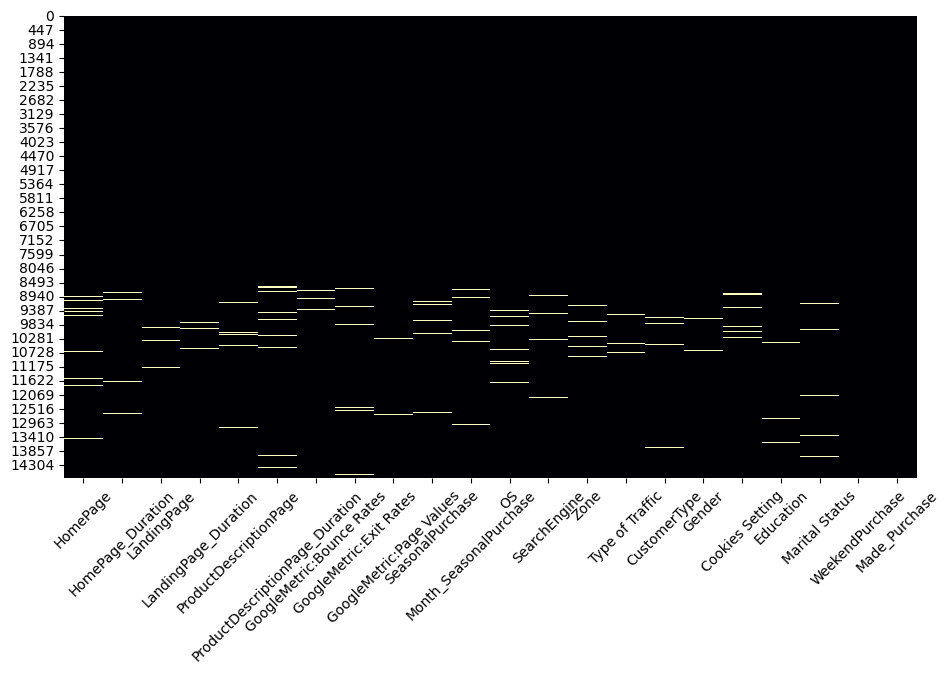

In [11]:
#display any missing values in a heatmap
fig = plt.figure(figsize=(11,6))
ax = sns.heatmap(df.isnull(),cmap = 'magma',cbar = False);
ax.tick_params(axis='x', labelrotation=45)

plt.show()

**Inference:** Due to the small proportion of values that are missing from the dataset, dropping the entire rows that contain any missing values can be the easiest method of processing.

But this result may have removed too many values.  So, missing value imputation should be used.

**Rename columns for ease of data manipulation.**

In [4]:
#rename columns
df = df.rename(columns={'GoogleMetric:Bounce Rates': 'bounce_rate', 'GoogleMetric:Exit Rates': 'exit_rate', 'GoogleMetric:Page Values': 'page_values',\
                   'Type of Traffic': 'traffic_type',  'Cookies Setting': 'cookies', 'Marital Status': 'marital_status', 
                       'ProductDescriptionPage_Duration': 'prod_desc_duration', 'LandingPage_Duration': 'land_page_duration', \
              'HomePage_Duration': 'home_page_duration', 'ProductDescriptionPage': 'prod_page'}
                        )

#change to all lowercase names
df.columns = df.columns.str.lower()

df.columns

Index(['homepage', 'home_page_duration', 'landingpage', 'land_page_duration',
       'prod_page', 'prod_desc_duration', 'bounce_rate', 'exit_rate',
       'page_values', 'seasonalpurchase', 'month_seasonalpurchase', 'os',
       'searchengine', 'zone', 'traffic_type', 'customertype', 'gender',
       'cookies', 'education', 'marital_status', 'weekendpurchase',
       'made_purchase'],
      dtype='object')

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
HomePage,14578.0,2.250240,3.288042,0.0,0.000000,1.000000,3.000000,27.000000
HomePage_Duration,14581.0,79.300762,179.374699,0.0,0.000000,5.000000,91.000000,3398.750000
LandingPage,14578.0,0.490739,1.252376,0.0,0.000000,0.000000,0.000000,24.000000
LandingPage_Duration,14596.0,33.455943,140.146256,0.0,0.000000,0.000000,0.000000,2549.375000
ProductDescriptionPage,14608.0,31.559488,44.897089,0.0,7.000000,17.500000,38.000000,705.000000
ProductDescriptionPage_Duration,14564.0,1184.346084,2009.496307,0.0,173.187500,584.333333,1434.255128,63973.522230
GoogleMetric:Bounce Rates,14580.0,0.023366,0.050011,0.0,0.000000,0.003478,0.018182,0.200000
GoogleMetric:Exit Rates,14602.0,0.044664,0.049912,0.0,0.014502,0.026406,0.050000,0.200000
GoogleMetric:Page Values,14599.0,4.812620,16.887366,0.0,0.000000,0.000000,0.000000,361.763742
SeasonalPurchase,14581.0,0.064083,0.202583,0.0,0.000000,0.000000,0.000000,1.000000


**Inference:** The time measurement of webpage interaction is a count of total seconds; however, some values are drastically larger than others, for some webpages (e.g., Product Description). Therefore, these data should be standardized before making predictions (i.e., the columns that count 'Duration' of time spent).

#### Defining Variables

Now the columns will be separated into **categorical** and **numerical** variables.

In [5]:
#organize columns by numerical and categorical values
cat_cols = ['weekendpurchase', 'marital_status', 'education', 'cookies', 'gender', 'customertype', 'traffic_type', 'zone',\
            'searchengine', 'os', 'month_seasonalpurchase']

num_cols = list(set(df.columns) - set(df[cat_cols]))

#drop the target variable from numeric columns
#df[num_cols].drop(columns = 'made_purchase', axis=1, inplace=True)

print("The categorical columns are: " + str(cat_cols), '\n''\n',\
      "The numerical columns are: " + str(num_cols))

#double check that all columns are accounted for
print((len(num_cols) + len(cat_cols)))

The categorical columns are: ['weekendpurchase', 'marital_status', 'education', 'cookies', 'gender', 'customertype', 'traffic_type', 'zone', 'searchengine', 'os', 'month_seasonalpurchase'] 

 The numerical columns are: ['bounce_rate', 'seasonalpurchase', 'homepage', 'land_page_duration', 'prod_page', 'prod_desc_duration', 'landingpage', 'exit_rate', 'home_page_duration', 'made_purchase', 'page_values']
22


#### Standardize numerical variables w/ Robust Scaler

Robust Scaler is the optimal standardization to use for datasets that contain many outliers.  This dataset falls into that category, so using Robust Scaler will ensure that the values are equally accounted for (but will not fall along a 0,1 continuum).

**Note --**
The column "Seasonal Purchase" needs to be included with the numerical variables, because it is already transformed along a weighted scale prior to the analysis; however, all other variables need transforming into normalized values first.

In [16]:
exclude = ['made_purchase']
new_nums = list(set(num_cols) - set(exclude))

**Be sure to exclude the target variable from either list of numerical variables.**

In [6]:
#drop target variable from list of numerical columns
num_cols.remove('made_purchase')
num_cols

['bounce_rate',
 'seasonalpurchase',
 'homepage',
 'land_page_duration',
 'prod_page',
 'prod_desc_duration',
 'landingpage',
 'exit_rate',
 'home_page_duration',
 'page_values']

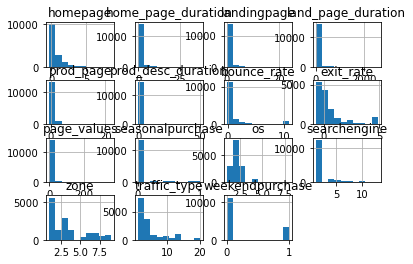

In [7]:
# visualize a robust scaler transform of the e-commerce dataset
from pandas import read_csv
from pandas import DataFrame
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import RobustScaler
from matplotlib import pyplot

# retrieve just the numeric input values
data = df[num_cols].values

# perform a robust scaler transform of the dataset
trans = RobustScaler()

# transform data and convert the array back to a dataframe
df[num_cols] = pd.DataFrame(trans.fit_transform(data), columns = num_cols) 

# histograms of the variables
df.hist()
pyplot.show()

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
homepage,14578.0,0.416747,1.096014,-0.333333,-0.333333,0.0,0.666667,8.666667
home_page_duration,14581.0,0.816492,1.971151,-0.054945,-0.054945,0.0,0.945055,37.293956
landingpage,14578.0,0.490739,1.252376,0.000000,0.000000,0.0,0.000000,24.000000
land_page_duration,14596.0,33.455943,140.146256,0.000000,0.000000,0.0,0.000000,2549.375000
prod_page,14608.0,0.453532,1.448293,-0.564516,-0.338710,0.0,0.661290,22.177419
prod_desc_duration,14564.0,0.475797,1.593488,-0.463364,-0.326030,0.0,0.673970,50.266288
bounce_rate,14580.0,1.093823,2.750580,-0.191304,-0.191304,0.0,0.808696,10.808696
exit_rate,14602.0,0.514323,1.406042,-0.743876,-0.335364,0.0,0.664636,4.890172
page_values,14599.0,4.812620,16.887366,0.000000,0.000000,0.0,0.000000,361.763742
seasonalpurchase,14581.0,0.064083,0.202583,0.000000,0.000000,0.0,0.000000,1.000000


**Inference:** the Robust Scaler was successful in retaining much of the useful information provided by the numerical variables; however, the number values fall outside of a [0,1] range.

#### Standard Scaler

In [35]:
from sklearn import preprocessing 

# converts pandas df to numpy array
array = df[num_cols].values 

# creates a min max scaler
data_scaler = preprocessing.MinMaxScaler(feature_range=(0,1)) 

# Scales the data and overwrites it into the existing dataframe
df[num_cols] = pd.DataFrame(data_scaler.fit_transform(array), columns = num_cols) 

df.describe().T

,count,mean,std,min,25%,50%,75%,max
homepage,14578.0,0.083342,0.121779,0.0,0.000000,0.037037,0.111111,1.0
home_page_duration,14581.0,0.023332,0.052777,0.0,0.000000,0.001471,0.026775,1.0
landingpage,14578.0,0.020447,0.052182,0.0,0.000000,0.000000,0.000000,1.0
land_page_duration,14596.0,0.013123,0.054973,0.0,0.000000,0.000000,0.000000,1.0
prod_page,14608.0,0.044765,0.063684,0.0,0.009929,0.024823,0.053901,1.0
prod_desc_duration,14564.0,0.018513,0.031411,0.0,0.002707,0.009134,0.022420,1.0
bounce_rate,14580.0,0.116830,0.250053,0.0,0.000000,0.017391,0.090909,1.0
exit_rate,14602.0,0.223321,0.249562,0.0,0.072508,0.132032,0.250000,1.0
page_values,14599.0,0.013303,0.046681,0.0,0.000000,0.000000,0.000000,1.0
seasonalpurchase,14581.0,0.064083,0.202583,0.0,0.000000,0.000000,0.000000,1.0


#### Create Dataset w/ all NaN values dropped.

In [9]:
df_clean = df.dropna()

#check for the percentage of missing values per column
total = df_clean.isnull().sum().sort_values(ascending=False)
percent_1 = df_clean.isnull().sum()/df_clean.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
homepage,0,0.0
home_page_duration,0,0.0
weekendpurchase,0,0.0
marital_status,0,0.0
education,0,0.0


##### Polynomial method for filling-in missing data.

In [36]:
#fill in missing values using a polynomial interpolation function
df_poly = df.interpolate(method='polynomial', order=2, limit_direction ='backward', axis=0)

#drop remaining missing values
df_poly.dropna(inplace=True)

df_poly.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13888 entries, 0 to 14730
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   homepage                13888 non-null  float64
 1   home_page_duration      13888 non-null  float64
 2   landingpage             13888 non-null  float64
 3   land_page_duration      13888 non-null  float64
 4   prod_page               13888 non-null  float64
 5   prod_desc_duration      13888 non-null  float64
 6   bounce_rate             13888 non-null  float64
 7   exit_rate               13888 non-null  float64
 8   page_values             13888 non-null  float64
 9   seasonalpurchase        13888 non-null  float64
 10  month_seasonalpurchase  13888 non-null  object 
 11  os                      13888 non-null  float64
 12  searchengine            13888 non-null  float64
 13  zone                    13888 non-null  float64
 14  traffic_type            13888 non-null  flo

In [37]:
df_poly.describe().T

,count,mean,std,min,25%,50%,75%,max
homepage,13888.0,0.083402,0.121937,-0.169424,0.000000,0.037037,0.148148,1.000000
home_page_duration,13888.0,0.023450,0.053260,-0.087911,0.000000,0.001471,0.026977,1.000000
landingpage,13888.0,0.020685,0.052874,-0.293953,0.000000,0.000000,0.000000,1.000000
land_page_duration,13888.0,0.013275,0.055693,-0.112890,0.000000,0.000000,0.000000,1.000000
prod_page,13888.0,0.044967,0.064168,-0.071462,0.009929,0.024352,0.053901,1.000000
prod_desc_duration,13888.0,0.018657,0.031799,-0.081744,0.002702,0.009155,0.022746,1.000000
bounce_rate,13888.0,0.116289,0.248986,-0.506822,0.000000,0.017795,0.090909,1.410906
exit_rate,13888.0,0.222526,0.249035,-0.240425,0.072378,0.131944,0.250000,1.231588
page_values,13888.0,0.013205,0.045330,-0.092645,0.000000,0.000000,0.000000,0.997760
seasonalpurchase,13888.0,0.063912,0.203299,-0.253690,0.000000,0.000000,0.000000,1.298319


### Exploratory Data Analysis.

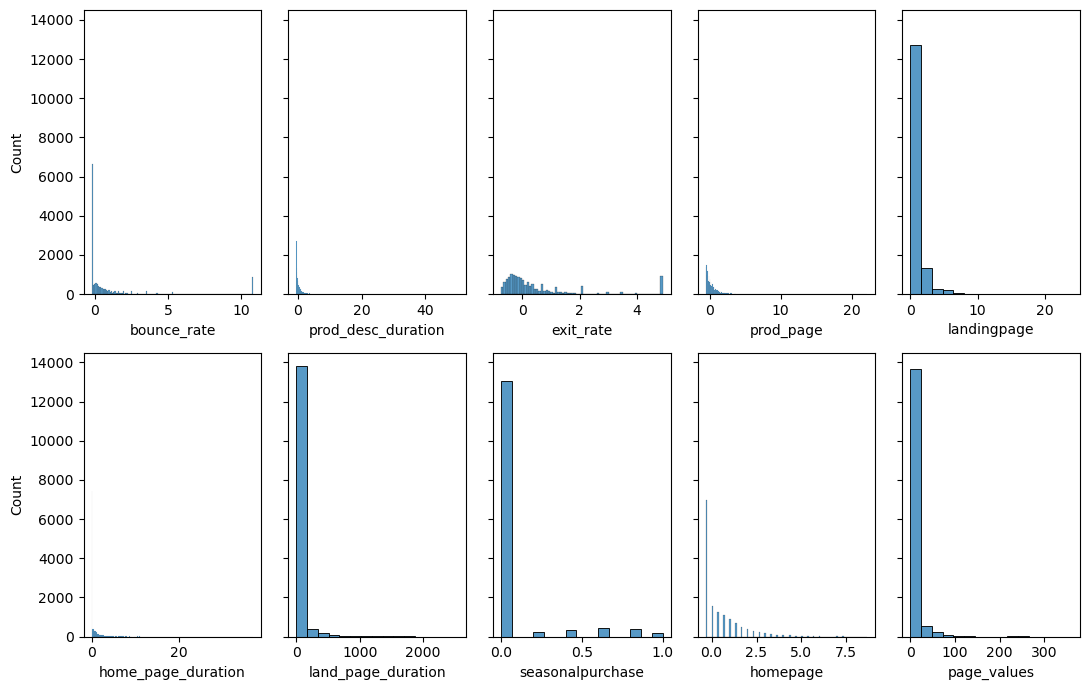

In [20]:
# Create a figure with ten subplots
fig, axes =  plt.subplots(2,5, figsize=(11,7), sharey=True)
#axes = axes.ravel()

sns.histplot(data = df, x = new_nums[0], ax = axes[0,0])
sns.histplot(data = df, x = new_nums[1], ax = axes[0,1])
sns.histplot(data = df, x = new_nums[2], ax = axes[0,2])
sns.histplot(data = df, x = new_nums[3], ax = axes[0,3])
sns.histplot(data = df, x = new_nums[4], ax = axes[0,4])
sns.histplot(data = df, x = new_nums[5], ax = axes[1,0])
sns.histplot(data = df, x = new_nums[6], ax = axes[1,1])
sns.histplot(data = df, x = new_nums[7], ax = axes[1,2])
sns.histplot(data = df, x = new_nums[8], ax = axes[1,3])
sns.histplot(data = df, x = new_nums[9], ax = axes[1,4])


# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


**Inference:** There is still some skewness present in the dataset.  This is likely due to the exceptionally brief time spend on certain pages by users (e.g., landing page, home page, and product page).

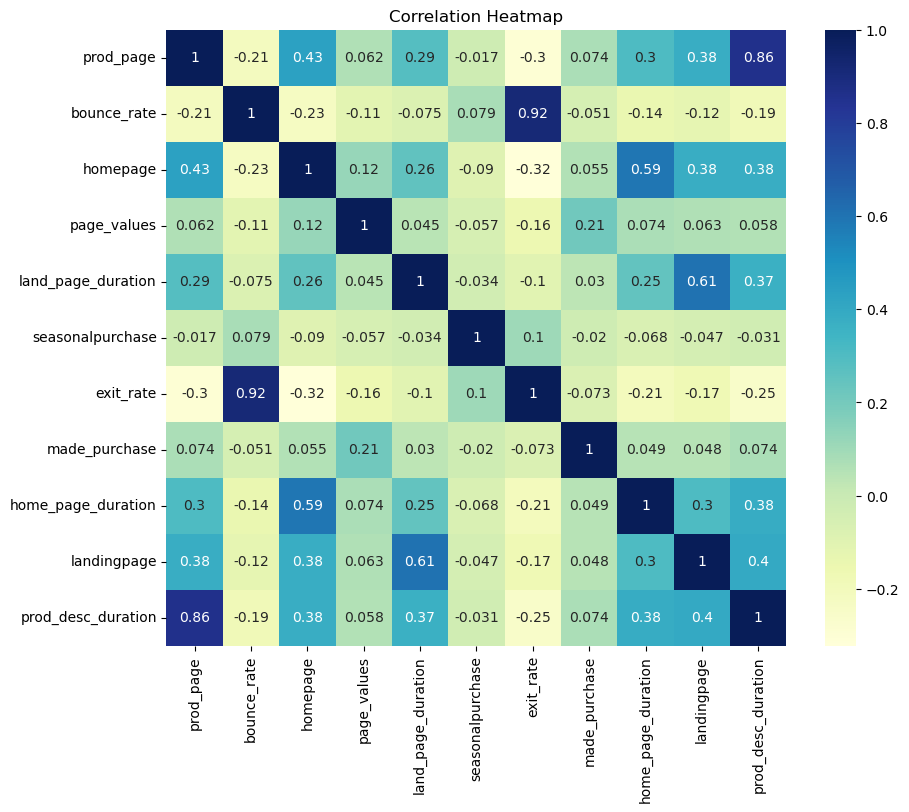

In [290]:
var_corr = df_clean[num_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(var_corr, xticklabels=var_corr.columns, yticklabels=var_corr.columns, annot=True, cmap="YlGnBu")
plt.title("Correlation Heatmap")
plt.show()

**Inference:** Correlation among the numerical variables and the target variable (Made Purchase) is overall pretty low.

<Axes: xlabel='made_purchase', ylabel='prod_desc_duration'>

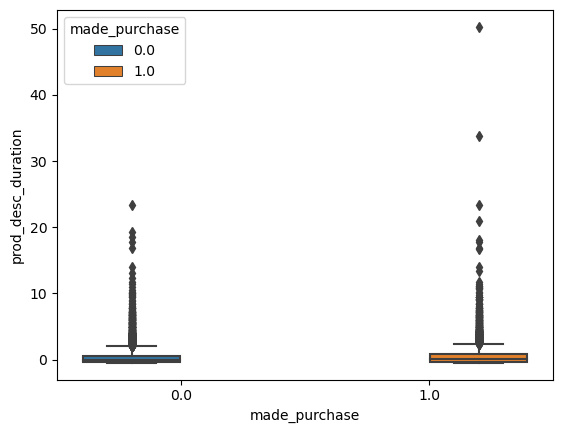

In [70]:
sns.boxplot(x="made_purchase", y ="prod_desc_duration", hue = "made_purchase", data= df_clean)

**Inference:** There are a large amount of outliers present still.

#### Outlier Detection and Removal Prior to Scaling/Standardizing Variables.

In [34]:
#create novel dataset
df_clean2 = df

#remove the target variable from the dataset
#df_clean2.drop('made_purchase', inplace=True, axis=1)

#perform outlier deletion using IQR method
Q1 = df_clean2[new_nums].quantile(0.25)
Q3 = df_clean2[new_nums].quantile(0.75)
IQR = Q3 - Q1
print('The IQR is: ', '\n', IQR, '\n\n')

#remove values that fall outside the first and third quartiles
df_clean2 = df_clean2[~((df_clean2[new_nums] < (Q1 - 1.5 * IQR)) | (df_clean2[new_nums] > (Q3 + 1.5 * IQR))).any(axis=1)]
print('The new dataframe shape is: ', df_clean2.shape, '\n\n'
    )

#check for missing values
print("The number of missing values is: ", '\n', str(df_clean2.isna().sum()),
      '\n\n'
     )

print(df_clean2.info())

The IQR is:  
 home_page_duration      91.000000
prod_page               31.000000
exit_rate                0.035498
page_values              0.000000
landingpage              0.000000
land_page_duration       0.000000
seasonalpurchase         0.000000
bounce_rate              0.018182
prod_desc_duration    1261.067628
homepage                 3.000000
dtype: float64 


The new dataframe shape is:  (6458, 21) 


The number of missing values is:  
 homepage                  72
home_page_duration        58
landingpage               58
land_page_duration        54
prod_page                 53
prod_desc_duration        71
bounce_rate               63
exit_rate                 49
page_values               79
seasonalpurchase          79
month_seasonalpurchase    68
os                        59
searchengine              61
zone                      48
traffic_type              71
customertype              60
gender                    69
cookies                   70
education                 

In [35]:
# visualize a robust scaler transform of the e-commerce dataset
from pandas import read_csv
from pandas import DataFrame
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import RobustScaler
from matplotlib import pyplot

# retrieve just the numeric input values
data = df_clean2[new_nums].values

# perform a robust scaler transform of the dataset
trans = RobustScaler()

# transform data and convert the array back to a dataframe
df_clean2[new_nums] = pd.DataFrame(trans.fit_transform(data), columns = new_nums) 

# histograms of the variables
df_clean2.describe().T

C:\Users\user\AppData\Local\Temp\ipykernel_6232\2708594481.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean2[new_nums] = pd.DataFrame(trans.fit_transform(data), columns = new_nums)


,count,mean,std,min,25%,50%,75%,max
homepage,2632.0,0.608093,0.909847,0.000000,0.000000,0.000000,1.000000,3.500000
home_page_duration,2648.0,0.652102,1.095686,0.000000,0.000000,0.000000,0.954212,4.996337
landingpage,2647.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
land_page_duration,2654.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
prod_page,2649.0,0.265139,0.903505,-0.764706,-0.411765,0.000000,0.647059,4.176471
prod_desc_duration,2643.0,0.287665,0.893989,-0.564789,-0.350639,-0.025272,0.613867,4.138239
bounce_rate,2648.0,0.574656,0.963041,0.000000,0.000000,0.000000,0.900000,4.090909
exit_rate,2651.0,0.191796,0.777234,-0.877830,-0.389770,-0.004827,0.627925,2.348789
page_values,2643.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
seasonalpurchase,2638.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### Further Preprocessing

- **Examine and remove any outliers present**
- **Use OneHot Encoding to transform categorical variables into dummy variables**
- **Assemble the final preprocessed dataset.**

#### Outlier Detection and Removal

The following columns need to be excluded from outlier pruning because of the nature of their values.  A priori testing resulted in removing too many relevant values from these columns after outlier removal.  Therefore, they will be kept as they are (in the Robust Scaler form and w/out any missing values).

**Exclude --**
['landingpage', 'land_page_duration', 'page_values', 'seasonalpurchase']

In [10]:
exclude = ['landingpage', 'land_page_duration', 'page_values', 'seasonalpurchase']

In [11]:
new_nums = list(set(num_cols) - set(exclude))
new_nums

['bounce_rate',
 'homepage',
 'prod_page',
 'prod_desc_duration',
 'exit_rate',
 'home_page_duration']

In [12]:
#using the inter-quartile range method to drop outliers
Q1 = df_clean[new_nums].quantile(0.25)
Q3 = df_clean[new_nums].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

bounce_rate           1.000000
homepage              1.333333
prod_page             0.967742
prod_desc_duration    0.997017
exit_rate             1.003142
home_page_duration    1.005495
dtype: float64


In [13]:
#remove values that fall outside the first and third quartiles
df_new = df_clean[~((df_clean[new_nums] < (Q1 - 1.5 * IQR)) | (df_clean[new_nums] > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_new.shape)

print("The number of outliers dropped is: " + str(len(df_clean) - len(df_new)))

(8214, 22)
The number of outliers dropped is: 3594


**Check new boxplot distributions**

<AxesSubplot:xlabel='made_purchase', ylabel='prod_desc_duration'>

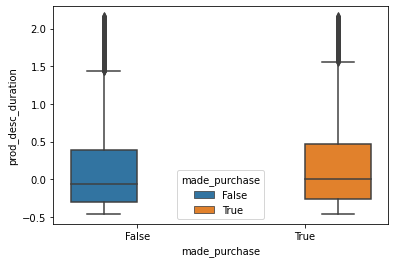

In [14]:
sns.boxplot(x="made_purchase", y ="prod_desc_duration", hue = "made_purchase", data= df_new)

#### Encode the categorical variables into dummy variables for the prediction models to include them.  


In [15]:
df_new[cat_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8214 entries, 2 to 14730
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   weekendpurchase         8214 non-null   float64
 1   marital_status          8214 non-null   object 
 2   education               8214 non-null   object 
 3   cookies                 8214 non-null   object 
 4   gender                  8214 non-null   object 
 5   customertype            8214 non-null   object 
 6   traffic_type            8214 non-null   float64
 7   zone                    8214 non-null   float64
 8   searchengine            8214 non-null   float64
 9   os                      8214 non-null   float64
 10  month_seasonalpurchase  8214 non-null   object 
dtypes: float64(5), object(6)
memory usage: 1.0+ MB


In [142]:
df_dummies = pd.get_dummies(data=df_new, \
                            columns=['weekendpurchase', 'marital_status', 'education', 'cookies', \
                                     'gender', 'customertype', 'traffic_type', 'zone',\
                                        'searchengine', 'os', 'month_seasonalpurchase'])

#df_cats = df_cats.loc[:, 'weekendpurchase':'month_seasonalpurchase']

#df_dummies = pd.get_dummies(data=df_cats)

print(df_dummies.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8214 entries, 2 to 14730
Data columns (total 87 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   homepage                        8214 non-null   float64
 1   home_page_duration              8214 non-null   float64
 2   landingpage                     8214 non-null   float64
 3   land_page_duration              8214 non-null   float64
 4   prod_page                       8214 non-null   float64
 5   prod_desc_duration              8214 non-null   float64
 6   bounce_rate                     8214 non-null   float64
 7   exit_rate                       8214 non-null   float64
 8   page_values                     8214 non-null   float64
 9   seasonalpurchase                8214 non-null   float64
 10  made_purchase                   8214 non-null   bool   
 11  weekendpurchase_0.0             8214 non-null   uint8  
 12  weekendpurchase_1.0             8

**Inference:** The categorical variables have all been converted to dummy variables.  Some columns were ignored (e.g., weekend purchase, and seasonal purchase) becuase they are already a categorical variable and standardized numerical variable, respectively.

### Feature Selection

In [147]:
features = df_dummies.drop(columns = 'made_purchase', axis=1)
features

,homepage,home_page_duration,landingpage,land_page_duration,prod_page,prod_desc_duration,bounce_rate,exit_rate,page_values,seasonalpurchase,...,month_seasonalpurchase_Aug,month_seasonalpurchase_Dec,month_seasonalpurchase_Feb,month_seasonalpurchase_Jul,month_seasonalpurchase_June,month_seasonalpurchase_Mar,month_seasonalpurchase_May,month_seasonalpurchase_Nov,month_seasonalpurchase_Oct,month_seasonalpurchase_Sep
2,-0.333333,-0.054945,0.0,0.0,-0.241935,0.034230,0.908696,0.664636,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
5,-0.333333,-0.054945,0.0,0.0,-0.467742,0.121854,-0.191304,-0.117871,0.0,0.4,...,0,0,1,0,0,0,0,0,0,0
6,-0.333333,-0.054945,0.0,0.0,-0.467742,-0.150137,-0.191304,1.134140,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
7,-0.333333,-0.054945,0.0,0.0,-0.338710,-0.240933,-0.191304,0.060988,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
8,-0.333333,-0.054945,0.0,0.0,-0.370968,-0.385652,-0.191304,1.134140,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14725,-0.333333,-0.054945,0.0,0.0,-0.435484,-0.408648,-0.191304,0.664636,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
14727,2.333333,1.231031,2.0,57.0,-0.209677,-0.262825,-0.191304,-0.431794,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
14728,0.333333,0.775824,2.0,652.8,-0.241935,0.443540,-0.191304,-0.086571,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
14729,-0.333333,-0.054945,0.0,0.0,-0.370968,0.374815,-0.191304,0.195132,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0


In [32]:
# Feature Extraction with SelectKBest
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from numpy import set_printoptions


#specify columns to select
array = df_dummies.values
exclude = ['made_purchase']

X = list(set(df_dummies) - set(exclude))
X = df_dummies[X].values
Y = array[:,10]

# feature extraction
test = SelectKBest(score_func=f_classif, k=9)
fit = test.fit(X, Y)

# summarize scores
set_printoptions(precision=3)

print(fit.scores_, '\n\n')
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])     



[5.321e-01 9.937e+00 5.577e+00 1.945e-01 6.043e-02 2.277e-01 5.127e+02
 2.600e-01 2.107e-02 2.769e-02 1.477e+01 2.768e+00 8.526e-03 4.928e-02
 1.680e-01 2.300e-01 1.047e+00 4.940e-02 1.168e+00 1.598e+01 2.547e+00
 6.413e-01 1.602e-01 1.096e+00 6.077e-02 1.400e+01 1.959e+00 5.344e-01
 1.399e+01 5.394e+00 1.180e-01 1.678e+00 5.119e-03 4.353e+00 3.054e-01
 4.144e+01 4.864e-02 4.268e+00 1.061e+00 1.710e+00 5.202e-01 6.768e-01
 3.325e-01 1.670e-02 1.215e+01 4.405e+00 2.784e+00 5.375e-01 2.742e+00
 3.225e-01 1.955e-03 1.149e+00 9.451e+00 2.311e-01 1.711e-02 1.226e+00
 9.021e-01 6.780e-01 2.447e-01 2.249e+00 4.237e-01 2.704e-01 1.047e+00
 5.983e-01 4.218e-01 3.522e-02 5.183e-02 1.085e+01 2.102e-01 1.851e+00
 3.435e-01 8.339e-01 1.101e+00 2.249e+00 5.524e-02 1.230e+00 4.907e-01
 3.137e-02 4.523e+00 1.191e+00 6.128e-01 1.197e-03 2.389e-01 3.279e-02
 7.182e+00 5.972e-03] 


[[ 0.     0.     0.034  0.909  1.     0.     0.665  0.    -0.242]
 [ 0.     0.     0.122 -0.191  1.     1.    -0.118  0.   

#### Determine Column Importance Using Feature Score

In [95]:
#assemble the two lists of values
features = fit.scores_
col_names = list(set(df_dummies.columns)  - set(df_dummies['made_purchase']))

#zip together the names and values of the features
feature_df = pd.DataFrame(zip(col_names, features))

#rename the columns using the first row values
feature_df = feature_df
feature_df.columns = feature_df.iloc[0]

#sort by highest scores
feature_df.columns = ['column', 'value']
#feature_df = feature_df.reset_index()
feature_df = feature_df.sort_values(by= 'value', axis=0, ascending=False)
feature_df.head(11)

,column,value
6,page_values,512.717203
35,exit_rate,41.439457
19,bounce_rate,15.982253
10,prod_desc_duration,14.774279
25,customertype_Returning_Visitor,13.995952
28,traffic_type_2.0,13.989402
44,customertype_New_Visitor,12.148054
67,marital_status_Single,10.846751
1,month_seasonalpurchase_Nov,9.936539
52,made_purchase,9.450600


## Model Assemble

### Logistic Regression w/ Feature Selection

In [33]:
input_var  = list(set(df_dummies.columns).difference('made_purchase'))
#define the target variable
X = features
y = df_dummies['made_purchase']

#partition the data into training and testing groups
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#fitting the model to training data
lr = LogisticRegression(C=0.01, solver='liblinear')
lr.fit(X_train,y_train)

#predict target values
logit_acc = lr.score(X_test, np.ravel(y_test)) #y_test is a pandas series that needs to be turned into a np array
print(logit_acc, '\n')

#assemble confusion matrix of predicted values
logit_pred = lr.predict(X_test)

print(metrics.classification_report(y_test, logit_pred, digits=3), '\n')
confusion_matrix(y_test, logit_pred)

0.6765031353744005 

              precision    recall  f1-score   support

       False      0.671     0.952     0.787      1701
        True      0.725     0.212     0.328      1010

    accuracy                          0.677      2711
   macro avg      0.698     0.582     0.557      2711
weighted avg      0.691     0.677     0.616      2711
 



array([[1620,   81],
       [ 796,  214]], dtype=int64)

##### Additional Models Using Feature Selection

In [97]:
from sklearn.metrics import accuracy_score

# List of classification models
models = [('Tree', DecisionTreeClassifier(criterion="entropy", max_depth=4)),
          ('Forest', RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)),
          ('SVM', svm.SVC(kernel='rbf')),
          ('NB', GaussianNB())
         ]

# Create empty dictionary
acc_dict = {}

# Iterate over each model
for model_name, model in models:
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = model.predict(X_test)
    
    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store accuracy score in the dictionary
    acc_dict[model_name] = accuracy
    
    print(f"{model_name}: Accuracy = {accuracy:.4f}")



Tree: Accuracy = 0.6769
Forest: Accuracy = 0.6787
SVM: Accuracy = 0.6820
NB: Accuracy = 0.6728


In [98]:
#JaccardIndex = jaccard_score(y_test, logit_pred,pos_label=0, average="micro")
from sklearn.metrics import jaccard_score

# List of classification models
models = [('Tree', DecisionTreeClassifier(criterion="entropy", max_depth=4)),
          ('Forest', RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)),
          ('SVM', svm.SVC(kernel='rbf')),
          ('NB', GaussianNB())
         ]

# Create empty dictionary
jacc_dict = {}

# Iterate over each model
for model_name, model in models:
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = model.predict(X_test)
    
    # Calculate accuracy score
    jaccardi = jaccard_score(y_test, y_pred) #pos_label=0, average="micro")
    
    # Store accuracy score in the dictionary
    jacc_dict[model_name] = jaccardi
    
    print(f"{model_name}: Jaccardi Score = {accuracy:.4f}")


Tree: Jaccardi Score = 0.6728
Forest: Jaccardi Score = 0.6728
SVM: Jaccardi Score = 0.6728
NB: Jaccardi Score = 0.6728


In [99]:
#F1_Score = f1_score(y_test, logit_pred, average='micro')
#JaccardIndex = jaccard_score(y_test, logit_pred,pos_label=0, average="micro")
from sklearn.metrics import f1_score

# List of classification models
models = [('Tree', DecisionTreeClassifier(criterion="entropy", max_depth=4)),
          ('Forest', RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)),
          ('SVM', svm.SVC(kernel='rbf')),
          ('NB', GaussianNB())
         ]

# Create empty dictionary
f1_dict = {}

# Iterate over each model
for model_name, model in models:
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = model.predict(X_test)
    
    # Calculate accuracy score
    f1 = f1_score(y_test, y_pred, average='micro')
    
    # Store accuracy score in the dictionary
    f1_dict[model_name] = f1
    
    print(f"{model_name}: F1 Score = {accuracy:.4f}")



Tree: F1 Score = 0.6728
Forest: F1 Score = 0.6728
SVM: F1 Score = 0.6728
NB: F1 Score = 0.6728


In [100]:
Report = [acc_dict, jacc_dict, f1_dict]

report_df = pd.DataFrame(data=Report, index = ["Accuracy", "Jaccardi Score", "F1 Score"])
          
report_df

,Tree,Forest,SVM,NB
Accuracy,0.676872,0.678716,0.682036,0.672814
Jaccardi Score,0.224092,0.238636,0.247818,0.188472
F1 Score,0.676872,0.678716,0.682036,0.672814


### Logistic Regression w/out Feature Selection

In [102]:
input_var  = list(set(df_dummies.columns).difference('made_purchase'))
#define the target variable
X = df_dummies[input_var]
y = df_dummies['made_purchase']

#partition the data into training and testing groups
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#fitting the model to training data
lr = LogisticRegression(C=0.01, solver='liblinear')
lr.fit(X_train,y_train)

#predict target values
logit_acc = lr.score(X_test, np.ravel(y_test)) #y_test is a pandas series that needs to be turned into a np array
print(logit_acc, '\n')

#assemble confusion matrix of predicted values
logit_pred = lr.predict(X_test)

print(metrics.classification_report(y_test, logit_pred, digits=3), '\n')
confusion_matrix(y_test, logit_pred)

0.99889339727038 

              precision    recall  f1-score   support

       False      1.000     0.998     0.999      1701
        True      0.997     1.000     0.999      1010

    accuracy                          0.999      2711
   macro avg      0.999     0.999     0.999      2711
weighted avg      0.999     0.999     0.999      2711
 



array([[1698,    3],
       [   0, 1010]], dtype=int64)

In [103]:
LR_Accuracy_Score = accuracy_score(y_test, logit_pred)
LR_JaccardIndex = jaccard_score(y_test, logit_pred,pos_label=0, average="micro")
LR_F1_Score = f1_score(y_test, logit_pred, average='micro')
LR_Log_Loss = log_loss(y_test, logit_pred)

print(LR_Accuracy_Score)
print(LR_JaccardIndex )
print(LR_F1_Score)
print(LR_Log_Loss)

0.99889339727038
0.997789240972734
0.99889339727038
0.03822158907304513


C:\Users\barbj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


**Check for overfitting of the model.**

In [104]:
# Checking for Overfitting or Underfitting the data

print("Training set score: {:.4f}".format(lr.score(X_train,y_train)))

print("Test set score: {:.4f}".format(lr.score(X_test,y_test)))

Training set score: 0.9996
Test set score: 0.9989


In [105]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [106]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [-2.952e-08  3.014e-06  3.629e-06 -8.395e-07 -1.875e-07 -1.174e-06
  1.664e-06  2.420e-06 -2.693e-06  3.297e-05  4.162e-06 -8.934e-07
  7.080e-05  4.282e-07 -5.722e-06  7.806e-07  3.512e-05  7.839e-06
  1.189e-06 -3.305e-06 -5.191e-06  1.023e-06 -4.964e-06 -6.069e-06
  1.695e-06 -2.328e-06 -3.400e-06  4.073e-06  1.244e-07  1.915e-05
 -8.559e-06  2.597e-06 -5.250e-06  1.893e-06 -8.574e-06 -3.984e-06
  4.113e-07 -5.214e-06 -5.175e-05  1.146e-06 -1.789e-05  4.925e-06
  1.927e-06 -9.080e-08  8.114e-07 -2.036e-05 -1.222e-05  2.752e-05
 -1.381e-05 -3.845e-06 -7.321e-06  1.694e-06  9.998e-01 -7.378e-06
 -1.470e-06 -8.323e-06 -4.867e-05  1.505e-05  1.003e-05  0.000e+00
 -3.625e-08 -4.084e-07 -4.243e-06  3.512e-05 -1.060e-06 -1.118e-06
  4.676e-06 -5.212e-07 -5.170e-07  6.524e-06  1.517e-06 -3.619e-07
  1.340e-05  3.379e-06  3.625e-08  1.303e-05 -2.402e-07 -1.580e-05
 -4.908e-06  8.410e-06  8.063e-06 -6.805e-05  1.985e-05  2.003e-06
 -1.102e-06 -6.361e-06 -1.519e-06]


In [107]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.9999999428407326
0.9999999409788534


In [108]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [-1.133e-06  0.000e+00  0.000e+00 -0.000e+00 -0.000e+00 -0.000e+00
  2.741e-03  0.000e+00 -0.000e+00  0.000e+00  0.000e+00 -0.000e+00
  0.000e+00  0.000e+00 -0.000e+00  0.000e+00  0.000e+00  0.000e+00
 -0.000e+00 -0.000e+00 -0.000e+00 -0.000e+00 -0.000e+00 -0.000e+00
  0.000e+00 -0.000e+00 -0.000e+00  0.000e+00  0.000e+00  0.000e+00
 -0.000e+00  0.000e+00 -0.000e+00  0.000e+00 -0.000e+00 -0.000e+00
  0.000e+00 -0.000e+00 -0.000e+00  0.000e+00 -0.000e+00  0.000e+00
  0.000e+00  0.000e+00  0.000e+00 -0.000e+00 -0.000e+00  0.000e+00
 -0.000e+00  0.000e+00  0.000e+00  0.000e+00  5.527e-01 -0.000e+00
 -0.000e+00  0.000e+00 -0.000e+00  0.000e+00  0.000e+00  0.000e+00
 -0.000e+00 -0.000e+00  0.000e+00  0.000e+00 -0.000e+00 -0.000e+00
 -0.000e+00 -0.000e+00  0.000e+00  0.000e+00 -0.000e+00  0.000e+00
  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00 -0.000e+00
 -0.000e+00  0.000e+00  0.000e+00 -0.000e+00  0.000e+00  0.000e+00
  0.000e+00 -0.000e+00 -0.000e+00]


In [109]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.8120051532682743
0.8106121347405815


**Inference:** After applying a penalty to the logistic regression algorithm, the accuracy score for the training and testing datasets were reduced to to 82%

##### Additional Classification Models

In [110]:
from sklearn.metrics import accuracy_score

# List of classification models
models = [('Tree', DecisionTreeClassifier(criterion="entropy", max_depth=4)),
          ('Forest', RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)),
          ('SVM', svm.SVC(kernel='rbf')),
          ('NB', GaussianNB())
         ]

# Create empty dictionary
acc_dict = {}

# Iterate over each model
for model_name, model in models:
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = model.predict(X_test)
    
    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store accuracy score in the dictionary
    acc_dict[model_name] = accuracy
    
    print(f"{model_name}: Accuracy = {accuracy:.4f}")



Tree: Accuracy = 1.0000
Forest: Accuracy = 1.0000
SVM: Accuracy = 0.6787
NB: Accuracy = 1.0000


In [111]:
#JaccardIndex = jaccard_score(y_test, logit_pred,pos_label=0, average="micro")
from sklearn.metrics import jaccard_score

# List of classification models
models = [('Tree', DecisionTreeClassifier(criterion="entropy", max_depth=4)),
          ('Forest', RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)),
          ('SVM', svm.SVC(kernel='rbf')),
          ('NB', GaussianNB())
         ]

# Create empty dictionary
jacc_dict = {}

# Iterate over each model
for model_name, model in models:
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = model.predict(X_test)
    
    # Calculate accuracy score
    jaccardi = jaccard_score(y_test, y_pred) #pos_label=0, average="micro")
    
    # Store accuracy score in the dictionary
    jacc_dict[model_name] = jaccardi
    
    print(f"{model_name}: Jaccardi Score = {accuracy:.4f}")



Tree: Jaccardi Score = 1.0000
Forest: Jaccardi Score = 1.0000
SVM: Jaccardi Score = 1.0000
NB: Jaccardi Score = 1.0000


In [112]:
#F1_Score = f1_score(y_test, logit_pred, average='micro')
#JaccardIndex = jaccard_score(y_test, logit_pred,pos_label=0, average="micro")
from sklearn.metrics import f1_score

# List of classification models
models = [('Tree', DecisionTreeClassifier(criterion="entropy", max_depth=4)),
          ('Forest', RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)),
          ('SVM', svm.SVC(kernel='rbf')),
          ('NB', GaussianNB())
         ]

# Create empty dictionary
f1_dict = {}

# Iterate over each model
for model_name, model in models:
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = model.predict(X_test)
    
    # Calculate accuracy score
    f1 = f1_score(y_test, y_pred, average='micro')
    
    # Store accuracy score in the dictionary
    f1_dict[model_name] = f1
    
    print(f"{model_name}: F1 Score = {accuracy:.4f}")



Tree: F1 Score = 1.0000
Forest: F1 Score = 1.0000
SVM: F1 Score = 1.0000
NB: F1 Score = 1.0000


### Summarize Performance Metrics

In [122]:
Report = [acc_dict, jacc_dict, f1_dict]

report_df = pd.DataFrame(data=Report, index = ["Accuracy", "Jaccardi Score", "F1 Score"])
          
report_df

,Tree,Forest,SVM,NB
Accuracy,1.0,1.0,0.678716,1.0
Jaccardi Score,1.0,1.0,0.205292,1.0
F1 Score,1.0,1.0,0.678716,1.0


### Further Assessment

--> **Overfitting Concerns.**

Because all of the classification models (outside logistic regression) scored perfectly on each of the performance metrics, there are some obvious concerns about having over-fit the sampling data.  Therefore, features selection and extraction was implemented prior to fitting the models.  This resulted in an accuracy and F1 Score 0f 67% for most of the classification models, which is a seemingly more realistic result. The original objective has been satisifed - determining which customers are likely to make a purchase on the given e-commerce website; and the most important variables have been determined too.  Using



In [114]:
#define performance function
def get_performance(actual_y, pred_y):
    cm = confusion_matrix(actual_y, pred_y)
    total = sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total
    sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
    specificity = cm[1,1]/(cm[1,0]+cm[1,1])
    return accuracy, sensitivity, specificity

# List of classification models
models = [('Logit', LogisticRegression(C=0.01, solver='liblinear')),
            ('Tree', DecisionTreeClassifier(criterion="entropy", max_depth=4)),
          ('Forest', RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)),
          ('SVM', svm.SVC(kernel='rbf')),
          ('NB', GaussianNB())
         ]

# Create empty dictionary
pred_y_dict = {}

# Iterate over each model
for model_name, model in models:
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = model.predict(X_test)
    
    # Store prediction values in the dictionary
    pred_y_dict[model_name] = y_pred
    
    print(pd.DataFrame(pred_y_dict))

      Logit
0     False
1      True
2     False
3      True
4     False
...     ...
2706  False
2707  False
2708  False
2709  False
2710  False

[2711 rows x 1 columns]
      Logit   Tree
0     False  False
1      True   True
2     False  False
3      True   True
4     False  False
...     ...    ...
2706  False  False
2707  False  False
2708  False  False
2709  False  False
2710  False  False

[2711 rows x 2 columns]
      Logit   Tree  Forest
0     False  False   False
1      True   True    True
2     False  False   False
3      True   True    True
4     False  False   False
...     ...    ...     ...
2706  False  False   False
2707  False  False   False
2708  False  False   False
2709  False  False   False
2710  False  False   False

[2711 rows x 3 columns]
      Logit   Tree  Forest    SVM
0     False  False   False  False
1      True   True    True  False
2     False  False   False  False
3      True   True    True   True
4     False  False   False  False
...     ...    ...     ..

Use predicted values to create dataframe.

In [115]:
pred_y_df = pd.DataFrame(pred_y_dict)
pred_y_df.head()

,Logit,Tree,Forest,SVM,NB
0,False,False,False,False,False
1,True,True,True,False,True
2,False,False,False,False,False
3,True,True,True,True,True
4,False,False,False,False,False


In [116]:
# Logit Regression
accuracy_lr, sensitivity_lr, specificity_lr = get_performance(y_test, pred_y_df['Logit'])


# Decision Trees 
accuracy_dt, sensitivity_dt, specificity_dt = get_performance(y_test, pred_y_df['Tree'])


# Random Forest
accuracy_rf, sensitivity_rf, specificity_rf = get_performance(y_test, pred_y_df['Forest'])

# Support Vector Machine
accuracy_svm, sensitivity_svm, specificity_svm = get_performance(y_test, pred_y_df['SVM'])

# Naive Bayes
accuracy_nb, sensitivity_nb, specificity_nb = get_performance(y_test, pred_y_df['NB'])

# Builds a dataframe using the performance indicators so that we can compare the models easily

perf = pd.DataFrame([accuracy_lr, accuracy_dt, accuracy_rf, accuracy_svm, accuracy_nb], 
                    columns = ['accuracy'], 
                    index = ['Logistic Regression','Decision Trees', 'Random Forest','SVM', 'Naive Bayes'])

perf['sensitivity'] = np.asarray([sensitivity_lr,
                                  sensitivity_dt, 
                                  sensitivity_rf,
                                  sensitivity_svm,
                                 sensitivity_nb])

perf['specificity'] = np.asarray([specificity_lr,
                                  specificity_dt,
                                  specificity_rf,
                                  specificity_svm,
                                 specificity_nb])

perf



,accuracy,sensitivity,specificity
Logistic Regression,0.998893,0.998236,1.000000
Decision Trees,1.000000,1.000000,1.000000
Random Forest,1.000000,1.000000,1.000000
SVM,0.678716,0.949442,0.222772
Naive Bayes,1.000000,1.000000,1.000000


In [117]:
from sklearn.model_selection import cross_val_score,cross_val_predict

print(lr)
CVS=cross_val_score(lr,X_train,y_train,cv=3)
print("Cross Validation Score: Logit Model", '\n\n', CVS)                                                                      #Cross Validation
CVP=cross_val_predict(lr,X_train,y_train,cv=3)
confusion_matrix(y_train,CVP)

LogisticRegression(C=0.01, solver='liblinear')
Cross Validation Score: Logit Model 

 [0.998 0.999 0.998]


array([[3384,    8],
       [   0, 2111]], dtype=int64)

In [118]:
print(models[1][1])
CVS=cross_val_score(models[1][1],X_train,y_train,cv=3)
print("Cross Validation Score: Decision Tree Model", '\n\n', CVS)                                                                      #Cross Validation
CVP=cross_val_predict(models[1][1],X_train,y_train,cv=3)
confusion_matrix(y_train,CVP)

DecisionTreeClassifier(criterion='entropy', max_depth=4)
Cross Validation Score: Decision Tree Model 

 [1. 1. 1.]


array([[3392,    0],
       [   0, 2111]], dtype=int64)

In [119]:
print(models[2][1])
CVS=cross_val_score(models[2][1],X_train,y_train,cv=3)
print("Cross Validation Score: Random Forest", '\n\n', CVS)                                                                      #Cross Validation
CVP=cross_val_predict(models[2][1],X_train,y_train,cv=3)
confusion_matrix(y_train,CVP)

RandomForestClassifier(max_depth=5, random_state=0)
Cross Validation Score: Random Forest 

 [1. 1. 1.]


array([[3392,    0],
       [   0, 2111]], dtype=int64)

In [120]:
print(models[3][1])
CVS=cross_val_score(models[3][1],X_train,y_train,cv=3)
print("Cross Validation Score: SVC", '\n\n', CVS)                                                                      #Cross Validation
CVP=cross_val_predict(models[3][1],X_train,y_train,cv=3)
confusion_matrix(y_train,CVP)

SVC()
Cross Validation Score: SVC 

 [0.675 0.684 0.669]


array([[3255,  137],
       [1646,  465]], dtype=int64)

In [121]:
print(models[4][1])
CVS=cross_val_score(models[4][1],X_train,y_train,cv=3)
print("Cross Validation Score: Naive Bayes", '\n\n', CVS)                                                                      #Cross Validation
CVP=cross_val_predict(models[4][1],X_train,y_train,cv=3)
confusion_matrix(y_train,CVP)

GaussianNB()
Cross Validation Score: Naive Bayes 

 [0.999 1.    1.   ]


array([[3391,    1],
       [   0, 2111]], dtype=int64)

**Inference.** 
Upon inspection of the models' performances on the training data, it seems that they performed commensurately well.  Therefore, the degree of variance (and therefore overfitting of the model) is apparently not a concern for this exercise.  Most of the models have near perfect results too.